# Chinese Text into Image
-----------
### Step 1: Input text

In the bottom cells, you may find the `TEXT` variable. Input your desired text there.
If you wish to manually seperate two paragraphs from one page, you may use `<br>` as an independent paragraph. This will start a new page.

```
TEXT = '''奶粉，白色的粉末，
滋養嬰兒，成就未來。
初生嬰兒，純真無邪，
母乳難得，奶粉來替。

愛，如奶粉般滋養，
陪伴嬰兒，成長茁壯。
家人的關愛，如奶粉般溫暖，
讓我們茁壯成長，支持著我們的未來。

恨，如奶粉般複雜，
假貨橫行，毒奶事件層出不窮。
嬰兒的健康，如奶粉般珍貴，
卻被不負責任的商家，輕易地犧牲。

<br>

奶粉，愛恨交織的代表，
滋養著嬰兒，卻也蘊藏著危險。
但願我們的愛，能像奶粉般純淨，
讓所有的嬰兒，都能健康茁壯成長。'''
```

-------------
### Step 2: Select attributes

There are many attributes to select from.

#### 1. PAGE

    This is the size of the canvas.
    
    (Default: 1080, 1080)

#### 2. MARGIN

    This is the margin of the canvas.
    Note: Right margin is not yet implemented, but can be controlled by the MAX_LINE_LENGTH

    (Default: 108, 103)

#### 3. MAX_LINE_LENGTH

    The maximum amount of characters per paragraph.
    
    (Default: 27)

#### 4. FONT_SIZE

    Font size of text in pixels

    (Default : 35)

#### 5. LINE_SPACING

    Amount of space between each line of text

    (Default: 53.5 - FONT_SIZE)

#### 6. FONT

    Pillow's ImageFont.truetype function. Can be changed to other fonts in your local directory.

    (Default: `ImageFont.truetype('./NotoSansTC-Medium.otf', size=FONT_SIZE)`)

#### 7. BASE_COLOR

    The Base Color of the Canvas.

    (Default: #ffffff)

#### 8. TEXT_COLOR

    The Color of the Text.

    (Default: #324450)

#### 9. isJPTWStyledPunctuation

    Puts the comma and period of the sentence to the bottom left corner, instead of being in the middle.

    (Default: True)

------


In [321]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
import re
import os
import shutil

In [322]:
# Define the page size and margin
PAGE = {"x": 1080, "y": 1080}
MARGIN = {"x": 108, "y": 103}
MAX_LINE_LENGTH = 27

# Define the font and size
FONT_SIZE = 35
LINE_SPACING = 53.5 - FONT_SIZE

FONT = ImageFont.truetype('./NotoSansTC-Medium.otf', size=FONT_SIZE)

# Color Settings
BASE_COLOR = "#ffffff"
TEXT_COLOR = "#324450"

# Whether JPTW Styled Punctuation will be used
isJPTWStyledPunctuation = True

In [323]:
# Define the text
TEXT = '''奶粉，白色的粉末，
滋養嬰兒，成就未來。
初生嬰兒，純真無邪，
母乳難得，奶粉來替。

愛，如奶粉般滋養，
陪伴嬰兒，成長茁壯。
家人的關愛，如奶粉般溫暖，
讓我們茁壯成長，支持著我們的未來。

<br>

恨，如奶粉般複雜，
假貨橫行，毒奶事件層出不窮。
嬰兒的健康，如奶粉般珍貴，
卻被不負責任的商家，輕易地犧牲。

奶粉，愛恨交織的代表，
滋養著嬰兒，卻也蘊藏著危險。
但願我們的愛，能像奶粉般純淨，
讓所有的嬰兒，都能健康茁壯成長。'''

------

# Code

------

In [324]:
# Process formatting of text
PROC_TEXT = TEXT.replace("\n\n", "LINEBREAK")
PROC_TEXT = PROC_TEXT.replace("\n", "")

In [325]:
# Seperate the program to paragraphs
raw_paragraphs = PROC_TEXT.split("LINEBREAK")
paragraphs = []
for p in raw_paragraphs:
    if p[0] == '*':
        paragraphs[-1] += f"{p[1:]}\n\n"
    else:
        p = p.replace("。", "。\n")
        p = p.replace("\n」", '」\n')

        if p[-1] != '\n':
            p += '\n'
        paragraphs.append(f"{p}")



def getCommaSeperated(text):
    # Check if the line is exceedingly long
    text_list = text.split('，')
    output = []

    new_line = ""

    for i in range(len(text_list)):
        if len(new_line) + len(text_list[i]) + 1 > MAX_LINE_LENGTH + 1:
            output.append(new_line)

            # Reset
            new_line = ""
        new_line += text_list[i] + '，'
    output.append(new_line[:-1])
    return output


print("-----------------------")

def fixParagraphs(paragraphs):
    def fixParagraph(paragraph):
        output = []
        lines = paragraph.split('\n')
        for line in lines:
            output.append("\n".join(getCommaSeperated(line)))
        
        return "\n".join(output)

    for i in range(len(paragraphs)):
        paragraphs[i] = fixParagraph(paragraphs[i])
    return paragraphs
paragraphs = fixParagraphs(paragraphs)

print(paragraphs)

-----------------------
['奶粉，白色的粉末，滋養嬰兒，成就未來。\n初生嬰兒，純真無邪，母乳難得，奶粉來替。\n', '愛，如奶粉般滋養，陪伴嬰兒，成長茁壯。\n家人的關愛，如奶粉般溫暖，讓我們茁壯成長，\n支持著我們的未來。\n', '<br>\n', '恨，如奶粉般複雜，假貨橫行，毒奶事件層出不窮。\n嬰兒的健康，如奶粉般珍貴，卻被不負責任的商家，\n輕易地犧牲。\n', '奶粉，愛恨交織的代表，滋養著嬰兒，卻也蘊藏著危險。\n但願我們的愛，能像奶粉般純淨，讓所有的嬰兒，\n都能健康茁壯成長。\n']


In [326]:
def getPageName(page_index):
    return f"output/page_{page_index}.png"

In [327]:
def getParagraphHeight(paragraph):
    line_count = len(paragraph.split("\n"))
    
    return line_count * (LINE_SPACING + FONT_SIZE) - LINE_SPACING

In [328]:
# Reset Directory

try:
    shutil.rmtree("./output")
except:
    pass
os.mkdir("./output")

------

# Output

------

output/page_1.png


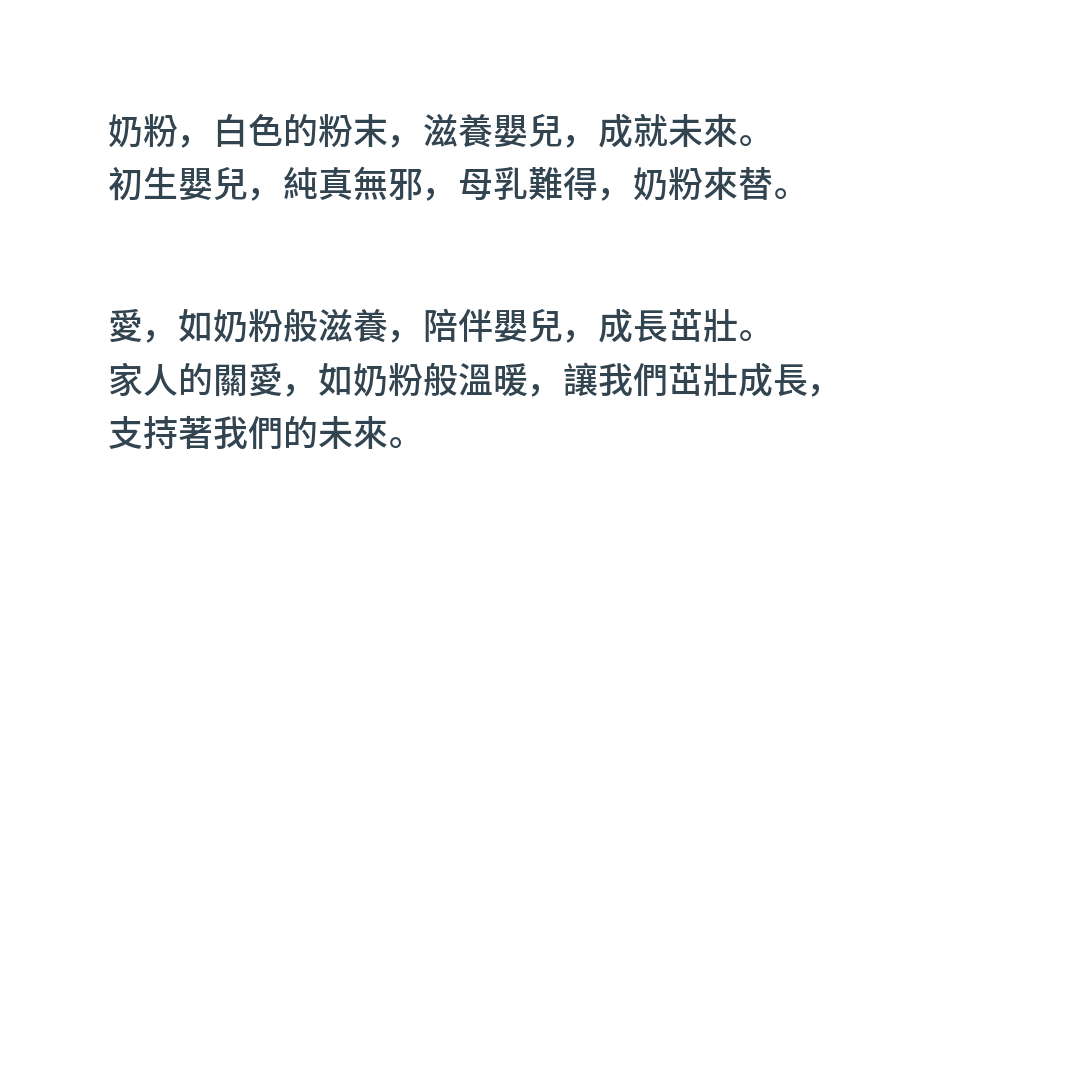

output/page_2.png


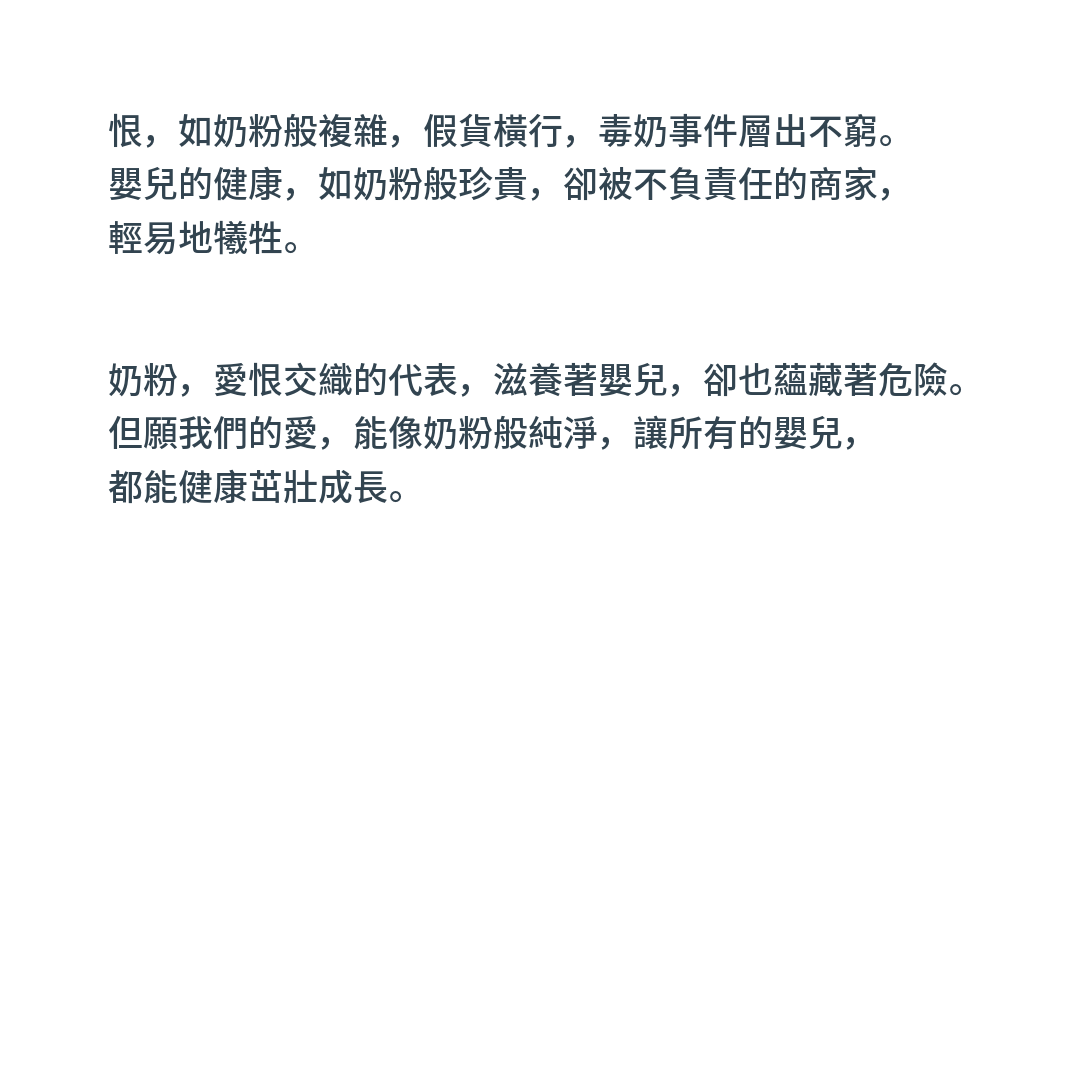

In [329]:
# Initialize the starting position of the text
x, y = MARGIN["x"], MARGIN["y"]
current_image = Image.new('RGB', (PAGE["x"], PAGE["y"]), color=BASE_COLOR)
draw = ImageDraw.Draw(current_image)


MAX_WIDTH = PAGE["x"] - 2 * MARGIN["x"]
MAX_Y = PAGE["y"] - MARGIN["y"] + 2 * (FONT_SIZE + LINE_SPACING)

page_index = 1

for paragraph in paragraphs:
    if "<br>" in paragraph:
        y = PAGE["y"]
        continue
    paragraph += "\n"
    if y + getParagraphHeight(paragraph) > MAX_Y:
        # If not fit, make new image
        current_image.save(getPageName(page_index))
        print(getPageName(page_index))
        display(current_image)


        page_index += 1
        x, y = MARGIN["x"], MARGIN["y"]

        # New Image:
        current_image = Image.new('RGB', (PAGE["x"], PAGE["y"]), color=BASE_COLOR)
        draw = ImageDraw.Draw(current_image)

    # WRITE CODE HERE:
    def jptwStyledPunctuation(
            paragraph,
            pos = (x,y),
            font = FONT,
            spacing = LINE_SPACING,
            fill = TEXT_COLOR
            ):
        lines = paragraph.split("\n")
        current_pos = pos
        for line in lines:
            # Find commas and periods
            punctuation_regex = re.compile(r"[，。]")
            punctuation_matches = punctuation_regex.finditer(line)
            line_index = 0

            # If there is no punctuation
            if not punctuation_regex.search(line):
                # Draw the text before the punctuation
                text_segment = line
                draw.text(
                    current_pos,
                    text=text_segment,
                    font=font,
                    fill=fill
                    )

            for punctuation_match in punctuation_matches:
                # Draw the text before the punctuation
                text_segment = line[line_index:punctuation_match.start()]
                draw.text(
                    current_pos,
                    text=text_segment,
                    font=font,
                    fill=fill
                    )
                line_index = punctuation_match.start() + 1

                # Draw the punctuation
                punctuation_char = line[punctuation_match.start()]
                punctuation_size = (int(font.getlength(punctuation_char)), FONT_SIZE)
                punctuation_offset = (punctuation_size[0] * 0.28,
                                    punctuation_size[1] * 0.28)
                punctuation_pos = (current_pos[0] + int(font.getlength(text_segment)) -
                                punctuation_offset[0],
                                current_pos[1] + punctuation_offset[1])

                draw.text(
                    punctuation_pos,
                    text=punctuation_char,
                    font=font,
                    fill=fill
                    )
                current_pos = (current_pos[0] + int(font.getlength(text_segment)) +
                            punctuation_size[0],
                            current_pos[1])
            
            
            # End of line
            current_pos = (pos[0], current_pos[1] + FONT_SIZE + spacing)

    if isJPTWStyledPunctuation:
        jptwStyledPunctuation(paragraph)
    else:
        draw.multiline_text(
            (x, y),
            paragraph,
            fill=TEXT_COLOR,
            font=FONT,
            spacing=LINE_SPACING
            )
    y += getParagraphHeight(paragraph)
print(getPageName(page_index))
display(current_image)
current_image.save(getPageName(page_index))